# Multinomial Naive Bayes
We will build NB model using the preprocessed dataset `data/2-imdb-movie-review-processed.csv` that we had created previously in EDA & preprocessing.

## Importing Processed Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# The final preprocessed files for building the models.
processed_dataset_path = 'data/2-imdb-movie-review-processed.csv'

data = pd.read_csv(processed_dataset_path)
data.head()

,review,sentiment
0,reviewer mention watch oz episode hook right exactly happen I thing strike I oz brutality unflinche scene violence set right word trust I faint hearted timid pull punch regard drug sex violence hardcore classic use word oz nickname oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass face inward privacy high agenda em city home aryan muslims gangstas latinos christians italian irish scuffle death stare dodgy dealing shady agreement far away I main appeal fact dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode I strike I nasty surreal I I ready I watch I develop taste oz accustom high level graphic violence violence injustice crook guard sell nickel inmate kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable view s touch dark,1
1,wonderful little production filming technique unassuming old time bbc fashion comfort discomforte sense realism entire piece actor extremely choose michael sheen polari voice pat truly seamless editing guide reference williams diary entry worth watching terrificly write perform piece masterful production great master comedy life realism come home little thing fantasy guard use traditional dream technique remain solid disappear play knowledge sense particularly scene concern orton halliwell set particularly flat halliwell mural decorate surface terribly,1
2,I think wonderful way spend time hot summer weekend sit air condition theater watch light hearted comedy plot simplistic dialogue witty character likable bread suspect serial killer disappoint realize match point risk addiction I think proof woody allen fully control style grow love I laugh woody comedy year dare I decade I impress scarlet johanson manage tone sexy image jump right average spirited young woman crown jewel career witty devil wear prada interesting superman great comedy friend,1
3,basically family little boy jake think zombie closet parent fight time movie slow soap opera suddenly jake decide rambo kill zombie ok film decide thriller drama drama movie watchable parent divorce argue like real life jake closet totally ruin film I expect boogeyman similar movie instead I watch drama meaningless thriller spot play parent descent dialog shot jake ignore,0
4,petter mattei love time money visually stunning film watch mr mattei offer vivid portrait human relation movie tell money power success people different situation encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect connect way person know previous point contact stylishly film sophisticated luxurious look people live world live habitat thing soul picture different stage loneliness inhabit big city exactly good place human relation find sincere fulfillment discern case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast character come alive wish mr mattei good luck await anxiously work,1


## Data Split

Class counter (stratified):
Entire-set  : Counter({1: 25000, 0: 25000}).
Train-set   : Counter({1: 20000, 0: 20000}).
Test-set    : Counter({0: 5000, 1: 5000}).


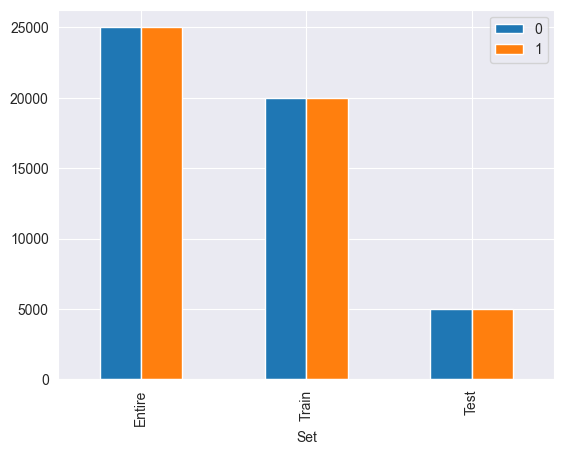

In [37]:
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold

# Randomness to reproduce same splits for comparisons.
random_state = 42

# K-fold split for cv.
kfold_n_split = 5

# K-fold shuffle for cv.
kfold_shuffle = True

# A stratified K fold for cross-validation strategy - values are assigned from the evaluation helper module.
# When random state is enabled, shuffle has to be enabled to. Shuffle is done before the deterministic split (sklearn doc).
skfolds = StratifiedKFold(n_splits=kfold_n_split,
                          shuffle=kfold_shuffle,
                          random_state=random_state)

# Define features (X) and target (y)
X = data["review"]  # Use processed text column
y = data["sentiment"]  # Target labels (0 or 1)

train_test_split(X, y, test_size=0.20, stratify=y, random_state=random_state)

# Split dataset into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=random_state)

# Display the counter for '1' and '0' in y set before splitting.
print('Class counter (stratified):')
print(f'Entire-set  : {Counter(y)}.')
print(f'Train-set   : {Counter(y_train)}.')
print(f'Test-set    : {Counter(y_test)}.')

std_y_data = [['Entire', Counter(y).get(0), Counter(y).get(1)],
              ['Train', Counter(y_train).get(0), Counter(y_train).get(1)],
              ['Test', Counter(y_test).get(0), Counter(y_test).get(1)]]

pd.DataFrame(std_y_data, columns=['Set', '0', '1']).set_index('Set').plot.bar();

# TF-IDF Vectorization (Feature Extraction)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. Otherwise, all features are used.
# Limits the max words used for building the model.
max_features = 20000

# TODO: Afif, please confirm and justify!
# Initialize TF-IDF Vectorizer
# vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=max_features)
vectoriser = TfidfVectorizer(ngram_range=(1, 2))

# Fit TF-IDF on cleaned training data
vectoriser.fit(X_train)

print('Vectoriser fitted.')
print('No. of feature words:', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature words: 2184927


In [27]:
# Apply transformation to convert text to TF-IDF vectors
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

print('Data Transformed.')

Data Transformed.


# Base Multimonimial Naive Bayes Model

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.8791
✅ Precision: 0.8792
✅ Recall: 0.8791
✅ F1-score: 0.8791

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5000
           1       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Base Model Confusion Matrics


🔹 Confusion Matrix:
[[4366  634]
 [ 575 4425]]


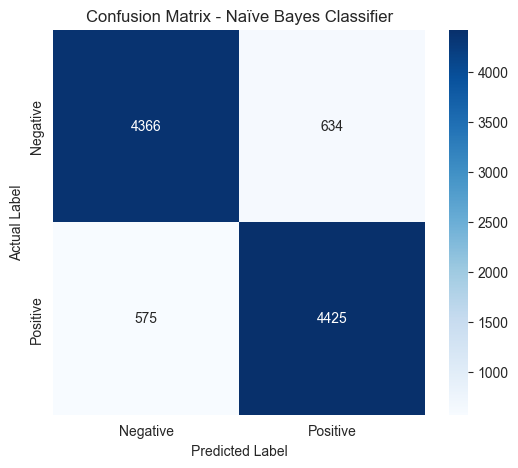

In [29]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n🔹 Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naïve Bayes Classifier")
plt.show()

# Multinomial Naive Bayes Hyper Parameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define parameter grid for tuning
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy', cv=skfolds)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_nb = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_nb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_best))

✅ Accuracy: 0.8831
✅ Precision: 0.8831
✅ Recall: 0.8831
✅ F1-score: 0.8831

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      5000
           1       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Tuned Model Confusion Matrics


🔹 Confusion Matrix:
[[4398  602]
 [ 567 4433]]


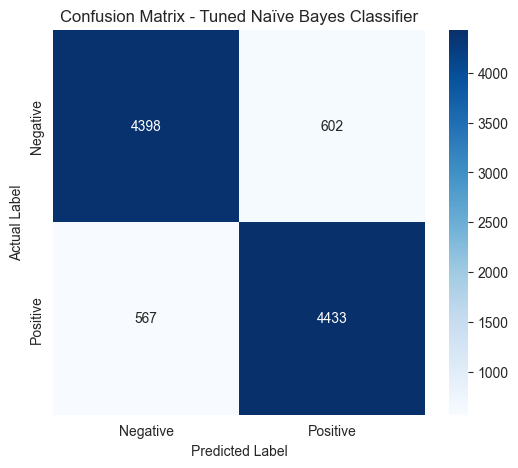

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for the tuned model predictions
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Print confusion matrix
print("\n🔹 Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Tuned Naïve Bayes Classifier")
plt.show()

## ROC CUrve

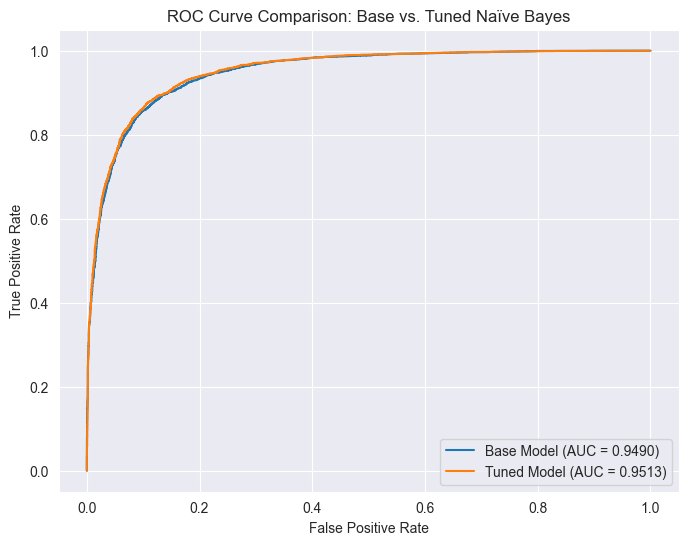

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Train the base model (if not already trained)
base_nb = MultinomialNB()
base_nb.fit(X_train, y_train)

# 2. Get predicted probabilities for the base model
y_proba_base = base_nb.predict_proba(X_test)[:, 1]

# 3. Get predicted probabilities for the tuned model
y_proba_tuned = best_nb.predict_proba(X_test)[:, 1]

# 4. Compute ROC metrics for the base model
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
auc_base = roc_auc_score(y_test, y_proba_base)

# 5. Compute ROC metrics for the tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
auc_tuned = roc_auc_score(y_test, y_proba_tuned)

# 6. Plot both ROC curves on the same figure
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f"Base Model (AUC = {auc_base:.4f})")
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned Model (AUC = {auc_tuned:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Base vs. Tuned Naïve Bayes")
plt.legend()
plt.show()